Fitted muzzle velocity:   5.91 ± 0.12 m/s
Fitted launch height:     1.88 ± 0.18 m


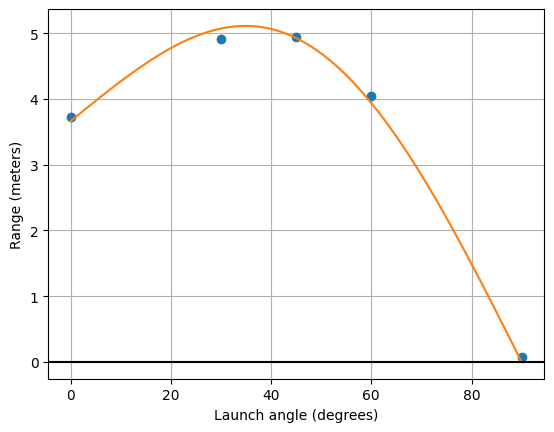

In [21]:
import numpy as np
import matplotlib.pyplot as plt



def calculate_range(launch_angle, muzzle_velocity, launch_height, gravitational_acceleration=9.80655):
    flight_time = (muzzle_velocity * np.sin(launch_angle) + np.sqrt(
        muzzle_velocity ** 2 * np.sin(launch_angle) ** 2 + 2*gravitational_acceleration * launch_height))/gravitational_acceleration
    return muzzle_velocity * np.cos(launch_angle) * flight_time


from scipy.optimize import curve_fit

def range_model(launch_angle, muzzle_velocity, launch_height):
    return calculate_range(launch_angle, muzzle_velocity, launch_height)

def fit_model(launch_angle, muzzle_velocity, launch_height):
    return calculate_range(launch_angle, muzzle_velocity, launch_height)

launch_angles = np.radians([0, 30, 45, 60, 90])
projectile_ranges = np.array([3.73, 4.92, 4.95, 4.05, 0.08])

# Perform the curve fitting
popt, pcov = curve_fit(lambda angle, v, h: fit_model(angle, v, h), launch_angles, projectile_ranges, p0=[7.0, 1.0])
perr = np.sqrt(np.diag(pcov))
print(f"Fitted muzzle velocity: {popt[0]:6.2f} ± {perr[0]:4.2f} m/s")
print(f"Fitted launch height:   {popt[1]:6.2f} ± {perr[1]:4.2f} m")

plt.plot(np.degrees(launch_angles), projectile_ranges, 'o')

all_angles = np.linspace(0, np.pi/2, 100)
all_ranges = calculate_range(all_angles, popt[0], popt[1])
plt.plot(np.degrees(all_angles), all_ranges)

plt.xlabel('Launch angle (degrees)')
plt.ylabel('Range (meters)')

plt.grid(True)
plt.axhline(y=0, color='k')
plt.grid(True)
plt.show()

$$\begin{array}{ll}
R &= v_0 \cos \theta t \\
0 &= v_0 \sin \theta t - \frac{1}{2} g t^2 \\
\implies t &= \frac{2 v_0 \sin \theta}{g} \\
\implies R &= \frac{2 v_0^2 \sin \theta \cos \theta}{g} \\
           &= \frac{v_0^2 \sin 2 \theta}{g} \\
\implies v_0 &= \sqrt{\frac{g R}{\sin 2 \theta}} \\
\end{array}$$

Assuming identical $v_0$
$$ \sqrt{\frac{g R_1}{\sin 2 \theta_1}} = \sqrt{\frac{g R_2}{\sin 2 \theta_2}}  $$


$$\sin 2 \theta_2 = \frac{R_2}{R_1} \sin 2 \theta_1$$

$$\theta_2 = \frac{1}{2} \arcsin \left(\frac{R_2}{R_1} \sin 2 \theta_1\right)$$

The domain of $\arcsin$ is $[-1, 1]$ so if $\theta_1 = \frac{\pi}{4}$ then $R_2$ must be $\leq R_1$ since $R_1, R_2 \geq 0$